<div>
    <p style="float: left;"><img src="images/python_logo.png" height="200px" width="200px" border="1px"></p>
    <center>
    <h1> The Supreme Py </h1>
    <br>
    by <a href="http://github.com/jsbarbosa">Juan Barbosa</a>
    </center>
</div>
<hr style="height:5px">

Please go to the following address: <a href="157.253.251.9:8080/video">157.253.251.9:8080/video</a>

# Brief introduction 
Ever since the creation of computers, its use has increased dramatically.
<IMG SRC="images/computer_use.png" WIDTH=600/>
U.S. Census Bureau. (2013, May 12). *Computer and Internet Use in the 
United States*. Retrieved October 4, 2016, from http://www.census.gov/prod/2013pubs/p20-569.pdf

<hr style="height:2px">

We use computers for all sorts of things:
### To connect
<img src="https://images-na.ssl-images-amazon.com/images/G/01//digital/video/merch/online.jpg" width=400/>
### To entertain
<img src="http://www.gadgetfolder.com/wp-content/uploads/2010/01/logitech_speaker_lapdesk_n700_2.jpg" width=400/>
### To write
<img src="https://www.uwlax.edu/uploadedImages/Academics/Departments/Psychology/WritingComputer.jpg" width=400/>
### To complete schoolwork
<img src="https://www.cos.edu/TrainingCenter/ComputerSoftwareSkills/PublishingImages/Computer.jpg" width=400/>
### On research
- data, *data* and **more data**

<hr style="height:1px">
## The dark side



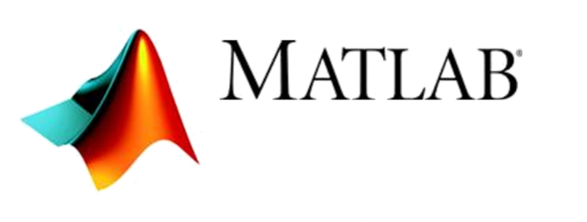

In [1]:
from IPython.display import display, HTML, Image
import urllib.request

display(Image("images/MATLAB_logo.png"))

## Pricing

- Student licenses for MATLAB can [cost][1] up to \$625 

- Python is free

   [1]: https://www.mathworks.com/pricing-licensing/?intendeduse=edu#acaindividual "MATLAB prices"

In [2]:
def clean_up(page, clean):
    for item in clean:
        page = page.replace(item, '')
    return page

url_matlab = 'https://www.mathworks.com/pricing-licensing/?intendeduse=edu#acaindividual'

response = urllib.request.urlopen(url_matlab)
html = response.read()
html = str(html)
html = clean_up(html, [r'\n', r'\t', r'\r', "b'"])
display(HTML(html))

<hr style="height:1px">
 ## The Force
<img src="http://jonathankinlay.com/wp-content/uploads/periodic-table-of-programming-languages-1-728.jpg"/>

<hr style="height:5px">

# A few Python advantages

- ## General Purpose
- ## Notebook
*"Jupyter notebooks are great because they allow you to easily present interactive figures. In addition, these notebooks include the figures and code in a single file, making it easy for others to reproduce your results."* [The File Drawer][1]

   [1]: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/ "The File Drawer"

- ## Easy to write

$$\bar{x} = \sum\limits_{n=1}^N \dfrac{x_n}{N} = \dfrac{x_1 + x_2 + \cdots + x_n}{N}$$

$$\sigma = \sqrt{\dfrac{1}{N-1}\sum\limits_{n=1}^N \left(x_n-\bar{x}\right)^2}$$

## Photograph examples

<img src="images/milkyway.jpg" width=600/>

<p style="text-align:right"> <strong>San Agustín, Colombia.</strong> April 2014. 99 Stacked photographs.</p>
<hr style="height:2px">

In [3]:
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.pylab import cm

%matplotlib inline

Number of stacked images is 56


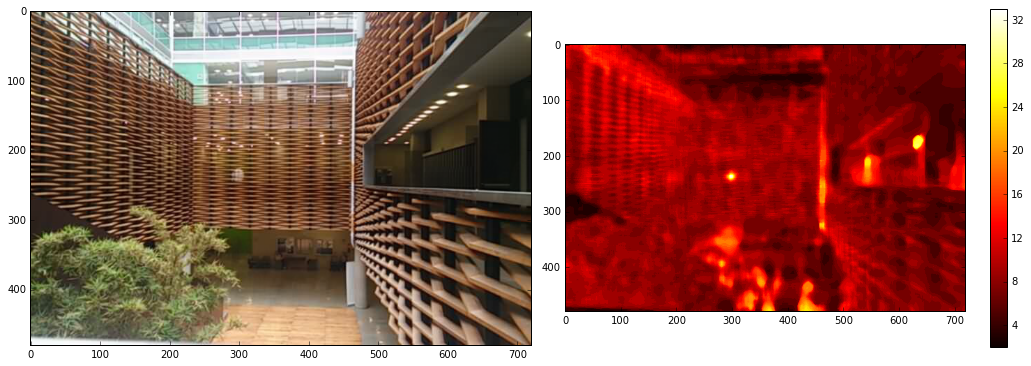

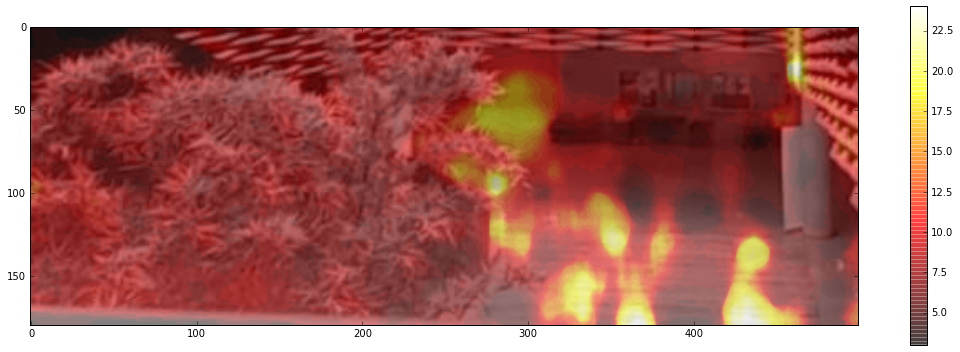

In [4]:
images = sorted(glob("streaming/*.jpg"))
loaded = []
for image in images:
    temp = cv2.imread(image, 1)
    loaded.append(temp)

loaded = np.array(loaded)
averaged = np.ceil(np.mean(loaded, axis=0))
deviation = np.ceil(np.std(loaded, axis=0))
averaged = averaged.astype(np.uint8)
deviation = deviation.astype(np.uint8)
averaged = cv2.cvtColor(averaged, cv2.COLOR_BGR2RGB)
deviation = cv2.cvtColor(deviation, cv2.COLOR_BGR2GRAY)

print("Number of stacked images is %d"%len(loaded))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(averaged)

blur = cv2.medianBlur(deviation, 15)
colors = ax2.imshow(blur, cmap="hot")
fig.colorbar(colors)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.imshow(cv2.cvtColor(averaged, cv2.COLOR_BGR2GRAY)[300:,:500], cmap='Greys_r')

colors = ax1.imshow(blur[300:,:500], cmap="hot", alpha=0.5)
fig.colorbar(colors)
plt.tight_layout()
plt.show()

<hr style="height:2px">

## Data mining

- Extracted data from *The New York Times* Facebook.
- Analysed the comments in a bunch of posts
- Counted the number of times the words: *Hillary, Clinton, Democrat* and *Donald, Trump, Republican* are mentioned by users.

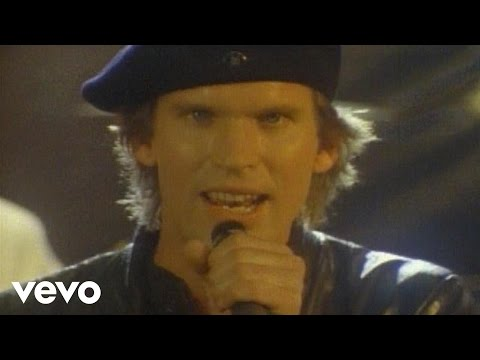

In [5]:
from IPython.display import YouTubeVideo

display(YouTubeVideo('btPJPFnesV4', autoplay=True))

<IPython.core.display.Javascript object>


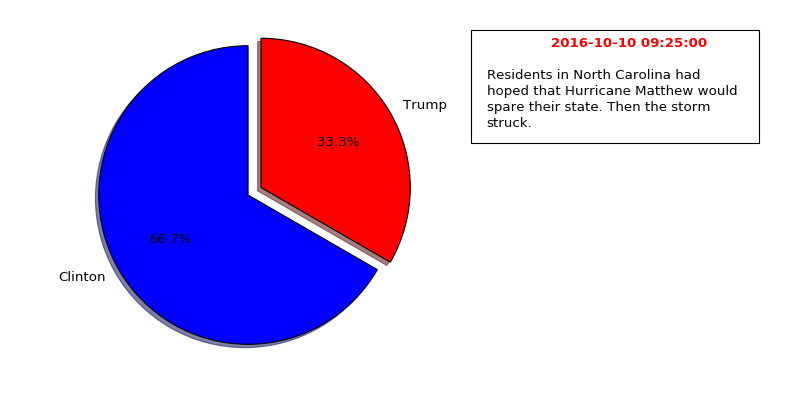

In [6]:
import csv
import textwrap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

%matplotlib notebook

date = []
message = []
numbers = []
with open('Output/US_Presidential_Data.csv') as f:
    read = csv.reader(f)
    for line in read:
        date.append(" ".join(line[:2]))
        message.append(line[2])
        numbers.append(line[-2:])
        
numbers = np.array(numbers).astype(float).T

labels = 'Clinton', 'Trump'
colors = ['blue', 'red']
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.clear()
ax2.clear()
ax2.set_ylim(0, 1.1)

def update(i):
    number = numbers[:,i]
    if not any(number == 0):
        sizes = [number[0], number[1]]
        ax1.clear()
        ax2.clear()
        
        ax1.pie(sizes, explode=explode, labels=labels, colors = colors, shadow=True, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')
        text = textwrap.wrap(message[i], width=35)
        textobjs = []
        for (j, line) in enumerate(text):
            textobjs.append(ax2.text(0.1, 0.9-0.05*j, line))
            
        ymin = 0.95-0.05*(j+2)
            
        rect = patches.Rectangle((0.05, ymin), 0.9, 1.05-ymin, facecolor='white')

        ax2.add_patch(rect)
        ax2.text(0.3,1, date[i], color='r', weight='bold')
        ax2.axis('off')
        fig.tight_layout(rect = [0.1, None, None, None])

ani = animation.FuncAnimation(fig, update, np.arange(2,(len(message))), interval=5000)

<hr style="height:5px">

# info
<h3>
- Get Superpowers with [Anaconda](https://www.continuum.io/downloads)
<br>
<br>
- [The core](https://www.python.org/dev/peps/pep-0020/)
<br>
<br>
- [The academy](https://www.codecademy.com/learn/python)
</h3>

<hr style="height:1px">
<p style="text-align:center"> <strong>Who</strong> is that in the [mirror](https://github.com/jsbarbosa/study-happiness/blob/master/English/The%20Supreme%20Py.ipynb)?</p>
<hr style="height:5px">